In [1]:
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.width', 1000)
pd.options.display.max_colwidth=120
print(os.getcwd())

/app


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
columns = ["Id","Entity","Target","Text"]
data = pd.read_csv("/app/data/twitter_training.csv", names=columns,header=None)

In [3]:
data.head()

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
1,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
2,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
3,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
4,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"


In [4]:
df_train = data[["Text","Target"]]
df_train.head()

,Text,Target
0,"im getting on borderlands and i will murder you all ,",Positive
1,"I am coming to the borders and I will kill you all,",Positive
2,"im getting on borderlands and i will kill you all,",Positive
3,"im coming on borderlands and i will murder you all,",Positive
4,"im getting on borderlands 2 and i will murder you me all,",Positive


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    73996 non-null  object
 1   Target  74682 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [6]:
df_train= df_train.drop_duplicates()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69773 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    69769 non-null  object
 1   Target  69773 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='Target', ylabel='count'>

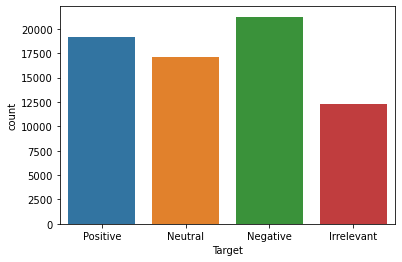

In [8]:
sns.countplot(x="Target",data=df_train)

In [9]:
data_val = pd.read_csv("/app/data/twitter_validation.csv", names=columns,header=None)
data_val.head()

,Id,Entity,Target,Text
0,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translate..."
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking, it's a truly awful game."
4,4433,Google,Neutral,Now the President is slapping Americans in the face that he really did commit an unlawful act after his acquittal! ...


In [10]:
df_val = data_val[['Text', 'Target']]
df_val.head()

,Text,Target
0,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translate...",Irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…,Neutral
2,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄,Negative
3,"CSGO matchmaking is so full of closet hacking, it's a truly awful game.",Negative
4,Now the President is slapping Americans in the face that he really did commit an unlawful act after his acquittal! ...,Neutral


In [11]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1000 non-null   object
 1   Target  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Target', ylabel='count'>

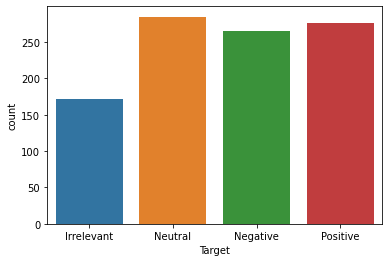

In [12]:
sns.countplot(x="Target",data=df_val)